<a href="https://colab.research.google.com/github/fwkhan/CE802/blob/master/CE802_P2_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reading Training and Test .CSV
  

In [2]:
train_data = pd.read_csv('CE802_P2_Data.csv')
final_test_data  = pd.read_csv('CE802_P2_Test.csv')
test_data = final_test_data.copy()
column_name = train_data.columns


# Data Analysis

### Function to print Data Info
This function takes all the columns and print their info sequentially


In [3]:
def print_data_info(train_data, col_name):
  """ 
    Prints information about train or test data. 

    This function prints information of each feature of a DataFrame, giving
    details about dtype, describe, min value, max value and null counts. 

    Parameters: 
    train_data (DataFrame): Input Training Data set  
    col_name   (str): Name of a feature

    Returns: No return Value
    
  """  
  print(f'*********Data Info************')
  print(f'***********{col_name}***************')
  print(f'data type  = {train_data[col_name].dtype}')
  print(f'Description  = {train_data[col_name].describe()}')
  print(f'MIN Value  = {train_data[col_name].min()}')
  print(f'MAX Value  = {train_data[col_name].max()}')
  print(f'NULL Values  = {train_data[col_name].isnull().sum()}')

## Train Data Analysis
Total Samples - 1500 


---Total Features - 15

*   F1 - F14 - No Null Values
*   F15 has 750 Null Values

*   F1,F2,F5 - int64
*   Column 'Class' to be predicted True/False










In [4]:
# Analysis of train data showing info and null count
print(f'{train_data.info(null_counts=False)}')
print(f'Null Value Information')
print(f'{train_data.isnull().sum()}')
# Printing information about each feature in loop.
for col_name in train_data.columns:
  print_data_info(train_data, col_name)
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F1      int64  
 1   F2      int64  
 2   F3      float64
 3   F4      float64
 4   F5      int64  
 5   F6      float64
 6   F7      float64
 7   F8      float64
 8   F9      float64
 9   F10     float64
 10  F11     float64
 11  F12     float64
 12  F13     float64
 13  F14     float64
 14  F15     float64
 15  Class   bool   
dtypes: bool(1), float64(12), int64(3)
memory usage: 177.4 KB
None
Null Value Information
F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64
*********Data Info************
***********F1***************
data type  = int64
Description  = count    1500.000000
mean       -6.638000
std         7.159315
min       -24.000000
25%       -14.000000
50%  

##Scatter plots highlight the distribution of data per class basis.


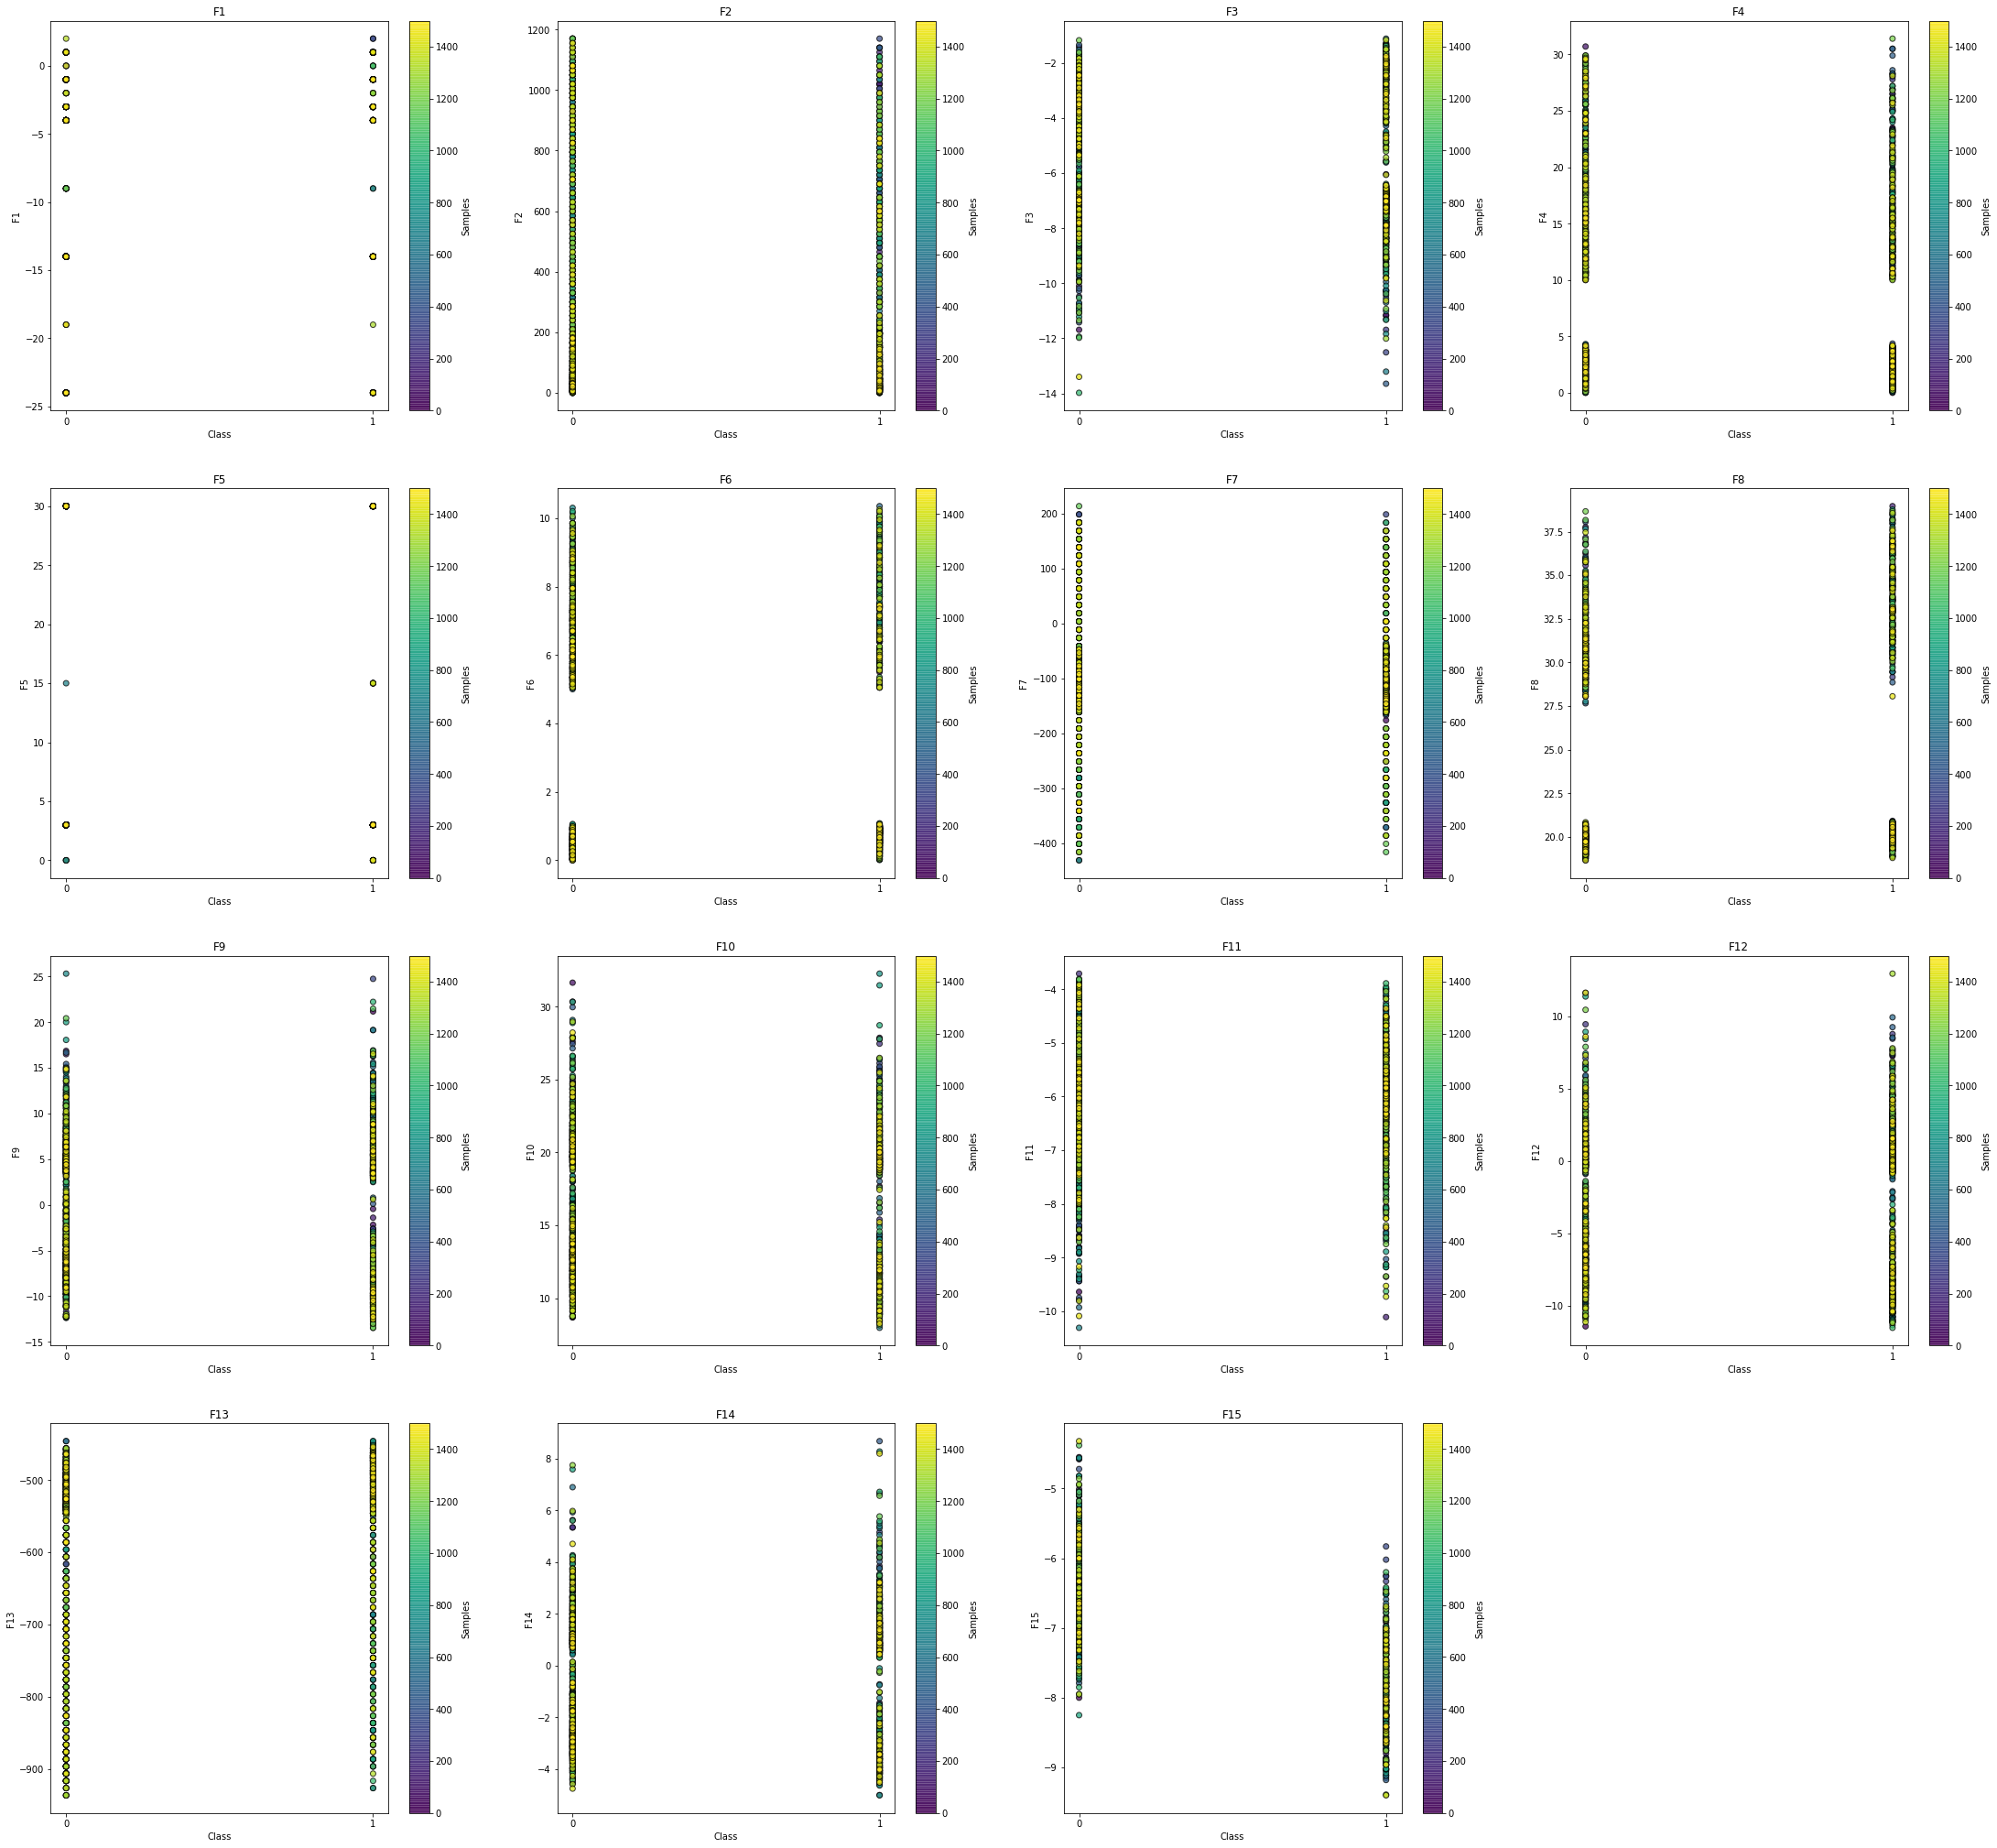

In [5]:
import matplotlib.pyplot as plt
x = train_data.iloc[:,:-1]
y = train_data['Class']
plt.figure(figsize=(38,36))

color = []
for sample in range(0,1500):
  color.append(sample)  # Marking samples with different color
for i in range(x.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.scatter(y,x.iloc[:,i], c=color, edgecolors='black', linewidths=1, alpha=0.75)

    plt.xticks([0, 1])
    plt.title(train_data.columns[i])
    plt.ylabel(train_data.columns[i])
    plt.xlabel('Class')
    cbar = plt.colorbar()
    cbar.set_label('Samples')

##Histogram showing feature F15 has missing values.

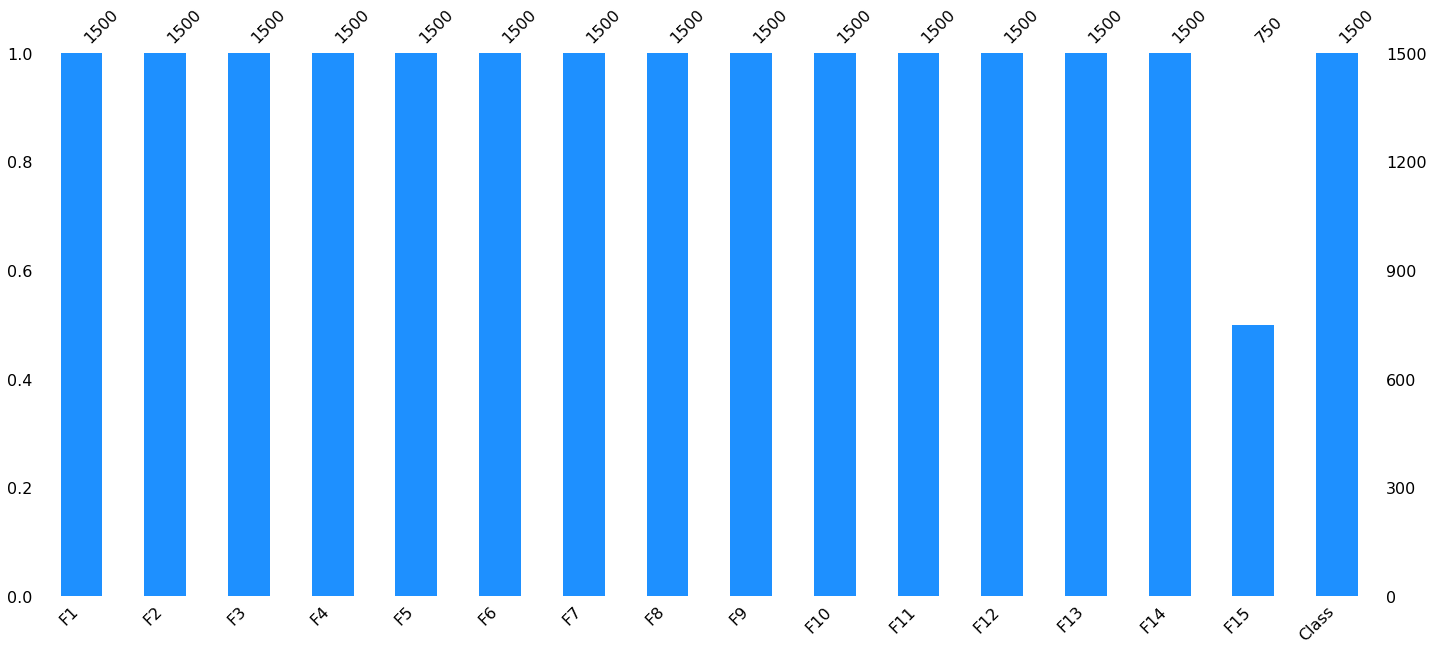

In [6]:
import missingno as msno
msno.bar(train_data, color='dodgerblue')


##Boxplot of Data distribution and Outliers presence

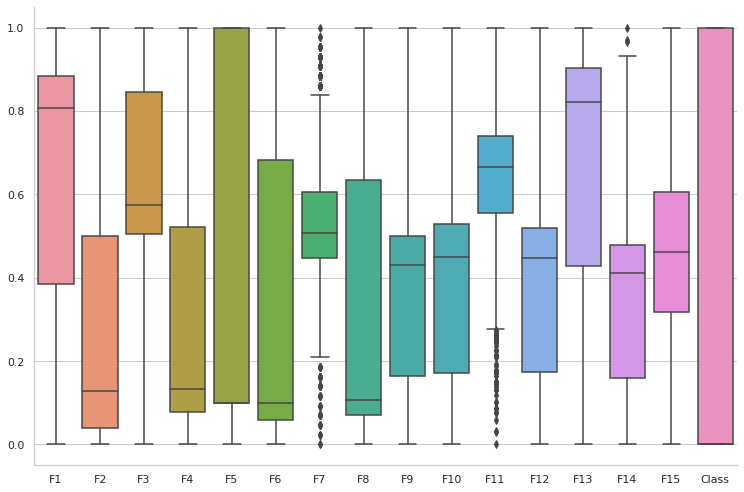

In [7]:
import seaborn as sns
data = train_data.copy()
# Copy of Train Data is scaled just for plotting, otherwise the plot is
# difficult to analyze because of the difference in range of numerical values.
scalar = MinMaxScaler()
data = scalar.fit_transform(train_data.values.reshape(-1, len(train_data.columns)))
data = pd.DataFrame(data, columns=train_data.columns)

sns.set_theme(style="whitegrid")
ax = sns.catplot(data=data, kind="box",
                height=7, aspect=1.5)


## Bar plot highlighting Class distribution

False    809
True     691
Name: Class, dtype: int64


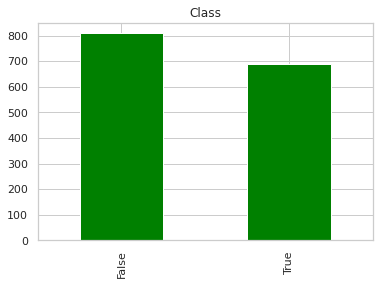

In [8]:
print(train_data.Class.value_counts())
train_data.Class.value_counts().plot(kind = 'bar', title = 'Class', color=["green"])

## Test Data Analysis
Total Samples - 1500 


---Total Features - 15

*   F1 - F14 - No Null Values
*   F15 has 750 Null Values

*   F1,F2,F5 - int64
*   Column 'Class' to be predicted True/False





*   F5 - int64




In [9]:
print(f'{test_data.info(null_counts=False)}')
print(f'Null Value Information')
print(f'{test_data.isnull().sum()}')
# Printing information about each feature in loop.
for col_name in test_data.columns:
  print_data_info(test_data, col_name)
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F1      int64  
 1   F2      int64  
 2   F3      float64
 3   F4      float64
 4   F5      int64  
 5   F6      float64
 6   F7      float64
 7   F8      float64
 8   F9      float64
 9   F10     float64
 10  F11     float64
 11  F12     float64
 12  F13     float64
 13  F14     float64
 14  F15     float64
 15  Class   float64
dtypes: float64(13), int64(3)
memory usage: 187.6 KB
None
Null Value Information
F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64
*********Data Info************
***********F1***************
data type  = int64
Description  = count    1500.000000
mean       -6.644000
std         7.073138
min       -24.000000
25%       -14.00000

## Heatmap for Correlation between different Columns 





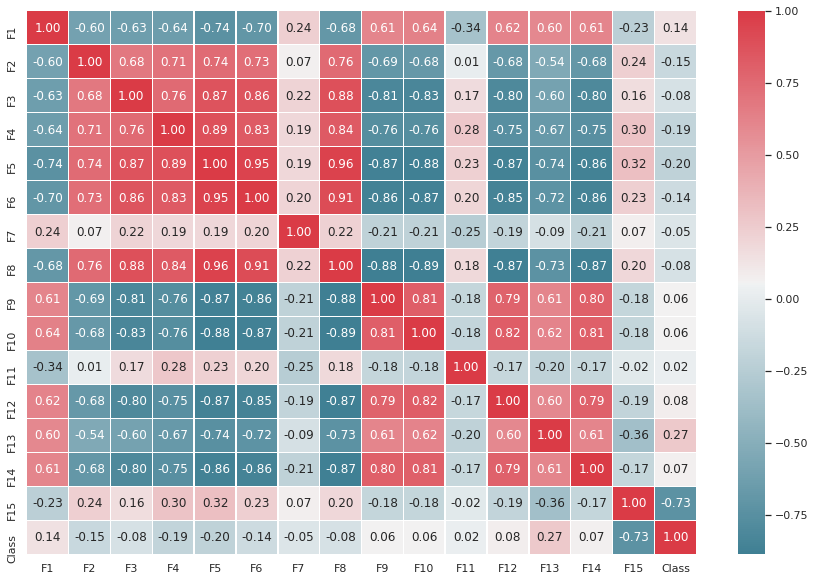

In [10]:
#Correlation analysis using Seaborn heatmap for data analysis
corr_matrix=train_data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap=colormap);

# Data Preprocessing

##Class to clip Outliers

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from statistics import median
import numpy as np
# This class in based on the Exercie-3 of Machine learning Lab-3

class OutlierScaler(BaseEstimator, TransformerMixin):
    def __init__(self, qoffset=1.5):
        """ 
          Initializes OutlierScaler Scaler object. 

          Initialized lower quartile, higher quartile, inter quartile range
          variables

          Parameters: 
          q_offset (float): Multiplier offset value  


          Returns: 
          class object 

        """        
        self.qoffset = qoffset
        self.outlier_columns = [] # list of features containing outliers
        self.lower_limit = {} # dictionary with key as feature and value as lower
                              # limit, below which all samples are treated as outliers
        self.upper_limit = {} # dictionary with key as feature and value as upper
                              # limit, above which all samples are treated as outliers

    def fit(self, X, y=None):
        """ 
          Fits data for transformation. 

          Calculates Inter Quartile range and
          Lower an Upper limit, w.r.t to each coloum, beyond which samples will
          be clipped.

          Parameters: 
          X (DataFrame): Training Data Set
          y (Series)  : Training dependent variable

          Returns: 
          class object 

        """       
        X = pd.DataFrame(X, columns=column_name)
        for col_name in X.columns:
          Q1 = X[col_name].quantile(0.01) # Lowere Quartile Value
          Q3 = X[col_name].quantile(0.9) # Higher Quartile Value
          IQR = Q3-Q1 # Inter Quartile Range
          # Storing lower limit specific to each feature
          self.lower_limit[col_name] = Q1 - self.qoffset*IQR 
          # Storing Upper limit specific to each feature
          self.upper_limit[col_name] = Q3 + self.qoffset*IQR
          # Finding out features for which their sample crosses lowere and upper
            # limit and storing it.
          if (len(X[( X[col_name]<self.lower_limit[col_name]) | (X[col_name] > self.upper_limit[col_name])][col_name])) >= 1:
            self.outlier_columns.append(col_name)
        
        return self

    def transform(self, X, y=None):
        """ 
          Transform data & Clip outliers. 

          Stores only the sample which are between lower and upper limit of each
          feature, calculated with fit() function.

          Parameters: 
          X (DataFrame): Training Data Set
          y (Series)  : Training dependent variable

          Returns: 
          X (DataFrame) Data without outliers. 
        """
        X = pd.DataFrame(X, columns=column_name)
        for col_name in self.outlier_columns:
          # Storing only the sample which are between lower and upper limit of each
          #feature.         
          X = X [ ( X[col_name] > self.lower_limit[col_name]) & (X[col_name] < self.upper_limit[col_name])]
        return X

    def fit_transform(self, X, y=None, **fit_params):
        """ Performs fit and transform sequentially"""
        self.fit(X, y)
        return self.transform(X, y)

## Converting F1 F2 from int64 to float64
Converting because test file has F1 and F2 as float64

In [12]:
# Converting to float since the test data has these variables as type float.
train_data['F1'] = train_data['F1'].astype(float)
train_data['F2'] = train_data['F2'].astype(float)

## Wrapper for Data imputation








In [13]:
imputer_obj = {} # To be used when doing predictions of hold out test set.

def impute_data(imputer_type, impute_data, strategy='mean', n_neighbors=2 ):
  """ 
    Performs either data imputation or dropping of entire feature. 

    This function perform 3 differnet data imputation strategies;
     - Iterative Imputer
     - Simple Imputer using Mean
     - KNN imputer 
    It also dorps F15 column if no imputation strategies are mentioned.

    Parameters: 
    imputer_type (str): Imputing Strategy  
    impute_data (DataFrame): Labelled Training Data 
    strategy (str): default = 'mean'
    n_neighbors (int): default = 2

    Returns: 
    data: Imputed Data 

  """  
  # Imputation of input feature is done without the labelled Class
  # because the iterative imputer gets influenced by the dependent Variable.
  data = impute_data.drop(columns='Class', axis=1)
  target_data = impute_data['Class']
  # Drops F15 Column
  if imputer_type == 'remove_column_F15':
    impute_data.drop(columns = 'F15', axis = 1, inplace=True)
    return impute_data
  elif imputer_type == 'iterative_imputer':
    imputer = IterativeImputer(max_iter=10, random_state= 42) 
    data = imputer.fit_transform(data) 
    # Storing the the object for imputing later on hold out data set.
    imputer_obj[imputer_type]  = imputer
  elif imputer_type == 'simple_imputer':
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imputer.fit(data)
    data = imputer.transform(data)
    imputer_obj[imputer_type]  = imputer
  elif imputer_type == 'knn_imputer':
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data = imputer.fit_transform(data)
    imputer_obj[imputer_type]  = imputer

  data = pd.DataFrame(data,columns=column_name[:-1])
  data['Class'] = target_data

  return data

## Wrapper for Data Scaling



In [14]:
scalar_obj = {} # To be used when doing predictions of hold out test set.

def normalize_data(normalize_type, data):
  """ 
    Performs data Scaling. 

    This function performs 3 differnet data Scaling strategies;
     - MinMaxScaler
     - StandardScaler
     - QuantileScaler 

    Parameters: 
    normalize_type (str): Scaling Strategy  
    data (DataFrame): Labelled Training Data 

    Returns: 
    data: Scaled Data 

  """    
  print('\x1b[1;31m'+f'Normalization Type: {normalize_type}'+'\x1b[0m')
  if normalize_type == 'MinMaxScaler':
    scalar = MinMaxScaler()
    data = scalar.fit_transform(data.values.reshape(-1, len(pd.DataFrame(data).columns)))
    scalar_obj[normalize_type]  = scalar
  elif normalize_type == 'StandardScaler':
    scalar = StandardScaler()
    data = scalar.fit_transform(data)
    scalar_obj[normalize_type]  = scalar
  elif normalize_type == 'QuantileScaler' :
    # Makes Gaussian distribution of data
    scalar = QuantileTransformer(output_distribution='normal')
    data = scalar.fit_transform(data)
    # Storing the the object for scaling later on hold out data set.
    scalar_obj[normalize_type]  = scalar
  return data

# Performance Modeling

##Wrapper for Cross-Validation and Grid Search

In [15]:
def model_grid_search(model, parameters, X_train, y_train):
  """ 
    Performs Grid Search hyper parameter tuning. 

    This function does Stratified K-fold Cross-Validation with 10 splits and 
    performs Grid Search. Best estimator obtained with Grid Search performs 
    training on the train data.

    Parameters: 
    model (str): Initialed object of one of the ML model  
    parameters (DataFrame): list of hyper parameters 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data     

    Returns: 
    grid_search: Object obtained from GridSearchCV 

  """   
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator = model, param_grid = parameters,
                            cv=cv, return_train_score = False, n_jobs = -1,
                            scoring = 'accuracy')
  grid_search.fit(X_train,y_train)
  best_accuracy = grid_search.best_score_
  return  grid_search

#Model Initialization & Parameter Tuning

##Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
def dtree_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize DecisionTree Classifier. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for DecisionTree. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_dtree: Best esitmator for DecisionTree 

  """  
  # Parameters for GridSearchCV
  parameters = {'criterion' :['entropy', 'gini'], 'max_depth':range(3,20)}
  model = DecisionTreeClassifier()
  # Calling api to perform GridSearchCV
  classifier_dtree = model_grid_search(model, parameters, X_train, y_train)
  return classifier_dtree

## SVM Classifier

In [17]:
from sklearn.svm import SVC
def svm_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize SVC Classifier. 

    This function initializes the parameters on which Grid Search has to be 
    performed internally calls the api to Grid Search, which returns the best
    estimator for SVC. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_dtree: Best esitmator for SVC 

  """   
  # Parameters for GridSearchCV
#  SVC(C=18.32980711, gamma = 0.0379269)
  Gs = np.logspace(-2, -1, 30)
  # Cs = np.logspace(1, 2, 10) 
  # Cs= np.linspace(1,5,10)
  Cs = np.linspace(10,25,14)
  # parameters = {'C' : Cs, 'gamma' : Gs, 'kernel' : ['rbf']}
  parameters = {'C' :[18.32980711], 'gamma' : [  0.0379269], 'kernel' : ['rbf']}
  
  model = SVC()
  # Calling api to perform GridSearchCV

  classifier_svm = model_grid_search(model, parameters, X_train, y_train)
  return classifier_svm


## Logisitic Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
def logistic_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize LogisticRegression Object. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for LogisticRegression. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_lr: Best esitmator for LogisticRegression 

  """    
  parameters = {'solver' : ['liblinear'],'C':[1,25,50,75,100]}
  model = LogisticRegression()
  classifier_lr = model_grid_search(model, parameters, X_train, y_train)
  return classifier_lr


##Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize RandomForest Classifier Object. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for RandomForest. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_rf: Best esitmator for RandomForest 

  """     
  parameters = {'criterion' :['entropy'], 'max_depth' : [9]}
  model = RandomForestClassifier()
  classifier_rf = model_grid_search(model, parameters, X_train, y_train)
  return classifier_rf


##XGBOOST Classfier

In [20]:
from xgboost import XGBClassifier
def xgboost_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize XGBoost Classifier. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for XGBoost. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_xgb: Best esitmator for XGBoost 

  """

  parameters = {'objective':['binary:logistic'],
                'learning_rate': [0.6],
                'n_estimators': [300],
                'n_jobs' : [-1]} 

  model = XGBClassifier()
  classifier_xgb = model_grid_search(model, parameters, X_train, y_train)
  return classifier_xgb



##Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting_classifier(X_train, y_train, X_test, y_test):
  """ 
    Initialize GradientBoosting Classifier Object. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for GradientBoosting. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    classifier_gradboosting: Best esitmator for GradientBoosting 

  """   
  parameters = {}
  # parameters = {'learning_rate' :[0.1, 0.5, 0.9], 'max_depth' : [3,5,7,9], 'max_features' : ['auto', 'sqrt', 'log2']}
  model = GradientBoostingClassifier()
  classifier_gradboosting = model_grid_search(model, parameters, X_train, y_train)
  return classifier_gradboosting

##Stacking

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier 

def stacking_classifier(X_train, y_train, X_test, y_test):
  """ 
    Stacking with different classifiers. 

    This function creates a list of estimators consisting of previously
    trained classifiers. Performs training on training data set and 
    prediction on the validation data set.

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    test_score: Score of prediction done on test data
    accuracy_mean: Average Cross Validation Score
    cross_valScore: List of all the Cross Validation Score

  """    
  # Initializing first level estimators for stacking
  estimators = [
  ('SVM', stack_dict['svm_classifier']),
  ('GRadBoost', GradientBoostingClassifier()),
  ('XGB' ,   stack_dict['xgboost_classifier'])
  ]
  classifier_stacking = StackingClassifier(
  estimators=estimators, final_estimator=stack_dict['logistic_classifier']
  )

  #fit of models performs training, Test Score calculation and Cross Validation Score.
  test_score, accuracy_mean, cross_valScore = fit_models(classifier_stacking, X_train, y_train, X_test, y_test)
  # Train & Predict
  classifier_stacking.fit(X_train, y_train)
  predictions = classifier_stacking.predict(X_test)
  # Plotting heatmap of confustion matrix
  matrix = confusion_matrix(y_test, predictions)
  plt.figure(figsize=(10,7))
  sns.heatmap(matrix, annot=True)
  plt.xlabel('predicted')
  plt.ylabel('Truth')
  plt.show()
  return test_score, accuracy_mean, cross_valScore

#Training and Prediction

## Preprocessing strategies

In [23]:
# Inintializing imputer, scaler and classifier list with different Imputing, scaling strategy
# and Classifiers repectively.
imputer_list = ['remove_column_F15', 'iterative_imputer', 'simple_imputer', 'knn_imputer']

imputer_strategy_list = ['mean']
scaler_list = ['MinMaxScaler', 'StandardScaler', 'QuantileScaler']

classifier_list = [svm_classifier,dtree_classifier,logistic_classifier, random_forest_classifier,  xgboost_classifier, gradient_boosting_classifier] #, stacking_classifier, bagging_classifier]

##Wrapper Function to Clip Outliers

In [24]:
  def clip_outliers(data):
    """ 
      Function to Clip Outliers. 

      This is wrapper function which internally call fit and transform
      methods of OutlierScaler Class

      Parameters: 
      data (DataFrame): Training Data Set

      Returns: 
      X (DataFrame): Data without outliers.
      y (Series): Data without outliers
    """    
    if 'F15' in data.columns:
      outlier_scalar.fit(data)
      data = outlier_scalar.transform(data)
      print(f'Number of samples after outlier removal: {len(data)}' )
    X = data.drop(['Class'],axis=1)
    y = data['Class']
    X = pd.DataFrame(X)
    return X,y

## Wrapper  to train and validate models









In [25]:
def fit_models(classifier, X_train, y_train, X_test, y_test):
    """ 
      Wrapper to train and Validate Classifiers. 

      This is a wrapper function which trains the classifer, gets the test 
      score, performs k-fold cross validation with 10 splits.

      Parameters: 
      X_train (DataFrame): Input Training Data set  
      y_train (DataFrame): Labelled Training Data 
      X_test (DataFrame): Input Validation Data set
      y_test (DataFrame): Labelled Validation Data

      Returns: 
      test_score: Score of prediction done on test data
      accuracy_mean: Average Cross Validation Score
      cross_valScore: List of all the Cross Validation Score

    """     
    classifier.fit(X_train, y_train)
    test_score = classifier.score(X_test,y_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_valScore = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = cv)
    accuracy_mean = cross_valScore.mean()*100
    return test_score, accuracy_mean, cross_valScore

Wrapper to print Model performance after every **iteration**

In [26]:
pip uninstall yellowbrick -y


Uninstalling yellowbrick-1.2.1:
  Successfully uninstalled yellowbrick-1.2.1


In [27]:
pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/b1/bb/57fd86c319a43666fe447bb1bc5af66fb0eb89dc4efc305a7544d50f52d6/yellowbrick-1.2.1-py3-none-any.whl


In [28]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import StratifiedKFold

# Declaring print() options for string formatting
print_format_tab_start = '\t \x1b[1;31m'
print_format_start = '\x1b[1;31m'
print_format_end = '\x1b[0m'

def print_after_every_iteration(sc_df, X_train, X_test, y_train, y_test):
    """ 
      Wrapper to print Learning curve & Confusion Matrix. 

      This is a wrapper function to print best classifier, best parameters, best
      score, confusion matrix, classification report, learning curve of that 
      classifier. It is called after each iteration of loop, called for different
      scaling strategies.

      Parameters:
      sc_df (DataFrame)  : Consisting of different models as rows
                           and columns=['Model','Test_Score', 'CV_MEAN',
                           'Imputer', 'Estimator', 'Best_Parameters']
      X_train (DataFrame): Input Training Data set  
      y_train (DataFrame): Labelled Training Data 
      X_test (DataFrame): Input Validation Data set
      y_test (DataFrame): Labelled Validation Data

      Returns: 
      None

    """   

    # Printing different scores for the model with maximum average across
    # all the Validation scores
    print(print_format_start+f'Imputer Type: {imputer_type}'+ print_format_end)  
    print(sc_df[['Model','Test_Score', 'CV_MEAN']])
    best_clf = (sc_df[sc_df['CV_MEAN'] == (sc_df.CV_MEAN.max())])
    print(print_format_start+ f'Best MODEL: { best_clf.Model.values[0]}'+ print_format_end)
    print(print_format_start+ f'Best parameters: {best_clf.Best_Parameters.values[0]}'+ print_format_end)
    print(print_format_start+ f'Best Average Score: {best_clf.CV_MEAN.values[0]}'+ print_format_end)

    # Extract best estimator for the model
    clf = best_clf['Estimator'].values[0] # Returns list of 1 element with best estimator at 0 index
    predictions = clf.predict(X_test)

    # Creating confusion matrix and printin heatmap
    
    print(print_format_tab_start + '========CONFUSTION MATRIX=======' + print_format_end)
    matrix = confusion_matrix(y_test, predictions)
    print(print_format_start+f'{matrix}'+print_format_end)
    plt.figure(figsize=(3,2))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".1f")
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    plt.show()

    # Creating Classification Report
    print(print_format_tab_start+ '========CLASSIFICATION REPORT=======' + print_format_end)
    print('\t', classification_report(y_test, predictions))

    # Creating Learning curve
    cv = StratifiedKFold(n_splits=10)
    sizes = np.linspace(0.3, 1.0, 10)
    lc_obj = LearningCurve(
        clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4, size=(270, 280), colormap="YlOrRd")

    lc_obj.fit(X_train, y_train)
    plt.figure(figsize=(2,2))
    lc_obj.show() 

##Wrapper function to  perform Training




In [29]:
def init_training(X_data, y):  
  """ 
    Wrapper to initiate training of Models. 

    This is a wrapper function where a loop for all the 3 scaling techniques,
    for each scaler; training and predictions are done for all the models.
    
    In each iteration, data is first scaled, divided in to test and train set,
    resampled with smote, to balance the classes in train set.
    In each iteration, all the classifiers are initialized and trained.

    Parameters:
    sc_df (DataFrame)  : Consisting of different models as rows
                          and columns=['Model','Test_Score', 'CV_MEAN',
                          'Imputer', 'Estimator', 'Best_Parameters']
    X_data (DataFrame): Input Training Data set  
    y (DataFrame): Labelled Training Data 

    Returns: 
    None

  """     
  # Loop for all the 3 scaling techniques, for each scaler, training and
  # predictions are done for all the models.
  for normalize_type in scaler_list:
    X = X_data.copy()
    # Scaling data
    X = normalize_data(normalize_type, X)
    #Train and Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=1 )
    # Smote balancing is applied to resample the imbalanced data
    smt = SMOTETomek(random_state = 42)  
    X_train, y_train = smt.fit_sample(X_train, y_train)
    mod_list = []
    # for a given imputing and scaling strategy, training all the models in a loop
    # and creating a list of models and their respective scores.
    for classifier_type in classifier_list:
      # Calling wrapper function for each classifier, which returns the
      # the best estimator for GridSearchCV
      classifier = classifier_type(X_train, y_train, X_test, y_test)
      # Training the classifer, gets the test, cv mean score, performs k-fold 
      # cross validation with 10 splits
      test_score, cv_mean, cv_core = fit_models(classifier.best_estimator_, X_train, y_train, X_test, y_test)
      # Building a list of dictionary, containing details about each model, with
      # all the Imputing and Scaling strategy.
      score_dict_list.append({
                  'Model': classifier_type.__name__,
                  'Estimator' : classifier.best_estimator_,
                  'Scaler' : normalize_type,
                  'Imputer' : imputer_type,
                  'Test_Score': test_score,
                  'CV_MEAN'  : cv_mean,
                  'CV_SCORE'  : cv_core,
                  'Best_Parameters': classifier.best_params_
      })
      # Creating another list, which gets initialized after each loop of 
      # scaling strategy, this list also contains details about all the model in
      # current Scaling loop, this list is just used for printing after every 
      # loop.
      mod_list.append({
        'Model': classifier_type.__name__, 
        'Test_Score':test_score ,
        'CV_MEAN': cv_mean,
        'Scaler' : normalize_type,
        'Imputer' : imputer_type,
        'Estimator' : classifier.best_estimator_,
        'Best_Parameters': classifier.best_params_
          })
      mod_list_df = pd.DataFrame(mod_list, columns=['Model','Test_Score', 'CV_MEAN', 'Imputer', 'Estimator', 'Best_Parameters'])
      # Printing details of the best model obtained after one combination of Imputing and
      # Scaling Strategy.
    print_after_every_iteration(mod_list_df, X_train, X_test, y_train, y_test)


## Init **Training** and Prediction of Models

Normalization Type: MinMaxScaler
Imputer Type: remove_column_F15
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.730667  74.272282
1              dtree_classifier    0.784000  76.375895
2           logistic_classifier    0.845333  84.990518
3      random_forest_classifier    0.832000  84.104772
4            xgboost_classifier    0.880000  88.310683
5  gradient_boosting_classifier    0.848000  84.516172
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 88.31068268015171
	 ========CONFUSTION MATRIX=======
[[179  24]
 [ 21 151]]


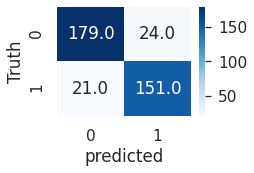

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.90      0.88      0.89       203
        True       0.86      0.88      0.87       172

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



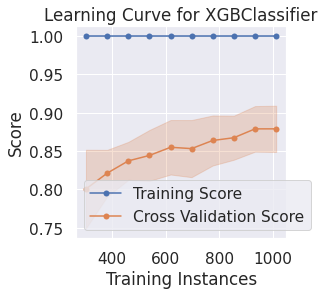

<Figure size 144x144 with 0 Axes>

Normalization Type: StandardScaler
Imputer Type: remove_column_F15
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.850667  86.922579
1              dtree_classifier    0.789333  77.882834
2           logistic_classifier    0.853333  85.126533
3      random_forest_classifier    0.821333  84.066398
4            xgboost_classifier    0.882667  88.336697
5  gradient_boosting_classifier    0.850667  85.362263
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 88.3366972002277
	 ========CONFUSTION MATRIX=======
[[182  21]
 [ 23 149]]


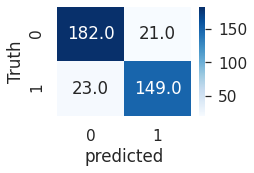

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.89      0.90      0.89       203
        True       0.88      0.87      0.87       172

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



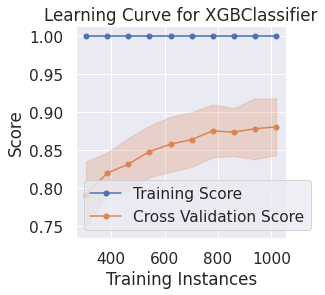

<Figure size 144x144 with 0 Axes>

Normalization Type: QuantileScaler
Imputer Type: remove_column_F15
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.909333  90.327836
1              dtree_classifier    0.741333  77.920540
2           logistic_classifier    0.837333  83.737381
3      random_forest_classifier    0.845333  84.169415
4            xgboost_classifier    0.874667  88.774113
5  gradient_boosting_classifier    0.829333  85.323838
Best MODEL: svm_classifier
Best parameters: {'C': 18.32980711, 'gamma': 0.0379269, 'kernel': 'rbf'}
Best Average Score: 90.327836081959
	 ========CONFUSTION MATRIX=======
[[183  20]
 [ 14 158]]


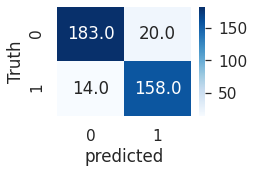

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.93      0.90      0.92       203
        True       0.89      0.92      0.90       172

    accuracy                           0.91       375
   macro avg       0.91      0.91      0.91       375
weighted avg       0.91      0.91      0.91       375



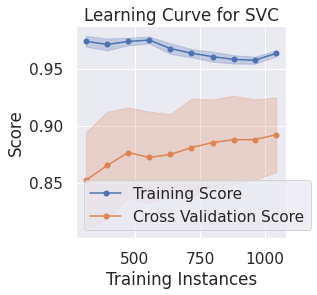

<Figure size 144x144 with 0 Axes>

Number of samples after outlier removal: 1500
Normalization Type: MinMaxScaler
Imputer Type: iterative_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.808000  84.697432
1              dtree_classifier    0.792000  84.785660
2           logistic_classifier    0.864000  88.647597
3      random_forest_classifier    0.864000  88.649377
4            xgboost_classifier    0.885333  90.651920
5  gradient_boosting_classifier    0.837333  87.487414
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 90.65191965420797
	 ========CONFUSTION MATRIX=======
[[180  23]
 [ 20 152]]


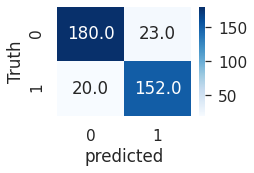

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.90      0.89      0.89       203
        True       0.87      0.88      0.88       172

    accuracy                           0.89       375
   macro avg       0.88      0.89      0.88       375
weighted avg       0.89      0.89      0.89       375



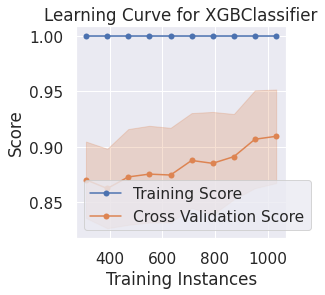

<Figure size 144x144 with 0 Axes>

Normalization Type: StandardScaler
Imputer Type: iterative_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.872000  90.600305
1              dtree_classifier    0.802667  85.084922
2           logistic_classifier    0.861333  88.529621
3      random_forest_classifier    0.853333  88.617086
4            xgboost_classifier    0.877333  89.844648
5  gradient_boosting_classifier    0.840000  88.354691
Best MODEL: svm_classifier
Best parameters: {'C': 18.32980711, 'gamma': 0.0379269, 'kernel': 'rbf'}
Best Average Score: 90.60030511060259
	 ========CONFUSTION MATRIX=======
[[175  28]
 [ 20 152]]


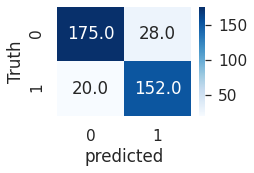

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.90      0.86      0.88       203
        True       0.84      0.88      0.86       172

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



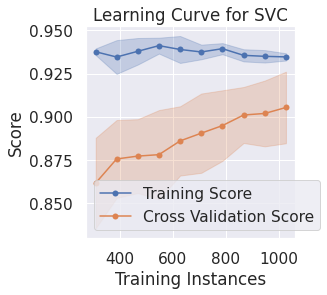

<Figure size 144x144 with 0 Axes>

Normalization Type: QuantileScaler
Imputer Type: iterative_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.904000  91.695402
1              dtree_classifier    0.832000  84.195402
2           logistic_classifier    0.861333  89.022989
3      random_forest_classifier    0.872000  89.022989
4            xgboost_classifier    0.896000  90.459770
5  gradient_boosting_classifier    0.866667  88.189655
Best MODEL: svm_classifier
Best parameters: {'C': 18.32980711, 'gamma': 0.0379269, 'kernel': 'rbf'}
Best Average Score: 91.69540229885057
	 ========CONFUSTION MATRIX=======
[[184  19]
 [ 17 155]]


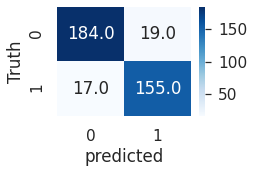

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.92      0.91      0.91       203
        True       0.89      0.90      0.90       172

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



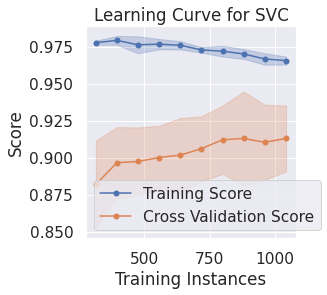

<Figure size 144x144 with 0 Axes>

STRATEGY:  mean
Number of samples after outlier removal: 1500
Normalization Type: MinMaxScaler
Imputer Type: simple_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.818667  82.917193
1              dtree_classifier    0.757333  80.632111
2           logistic_classifier    0.856000  88.672830
3      random_forest_classifier    0.832000  87.456279
4            xgboost_classifier    0.882667  90.360830
5  gradient_boosting_classifier    0.829333  87.513959
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 90.36083017277709
	 ========CONFUSTION MATRIX=======
[[179  24]
 [ 20 152]]


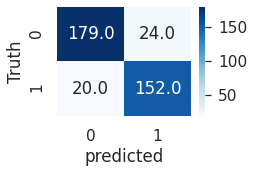

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.90      0.88      0.89       203
        True       0.86      0.88      0.87       172

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



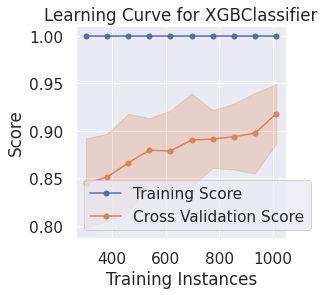

<Figure size 144x144 with 0 Axes>

Normalization Type: StandardScaler
Imputer Type: simple_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.882667  88.460546
1              dtree_classifier    0.768000  81.461231
2           logistic_classifier    0.856000  89.441898
3      random_forest_classifier    0.842667  87.394912
4            xgboost_classifier    0.896000  91.135957
5  gradient_boosting_classifier    0.829333  88.166614
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 91.1359565950274
	 ========CONFUSTION MATRIX=======
[[179  24]
 [ 15 157]]


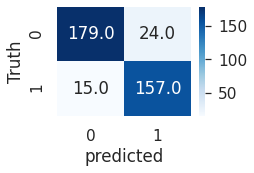

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.92      0.88      0.90       203
        True       0.87      0.91      0.89       172

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



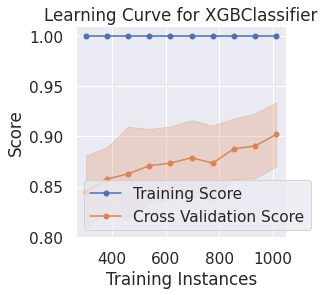

<Figure size 144x144 with 0 Axes>

Normalization Type: QuantileScaler
Imputer Type: simple_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.901333  91.982759
1              dtree_classifier    0.794667  81.695402
2           logistic_classifier    0.848000  88.045977
3      random_forest_classifier    0.842667  87.902299
4            xgboost_classifier    0.885333  89.597701
5  gradient_boosting_classifier    0.826667  87.988506
Best MODEL: svm_classifier
Best parameters: {'C': 18.32980711, 'gamma': 0.0379269, 'kernel': 'rbf'}
Best Average Score: 91.98275862068967
	 ========CONFUSTION MATRIX=======
[[184  19]
 [ 18 154]]


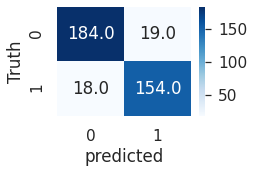

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.91      0.91      0.91       203
        True       0.89      0.90      0.89       172

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



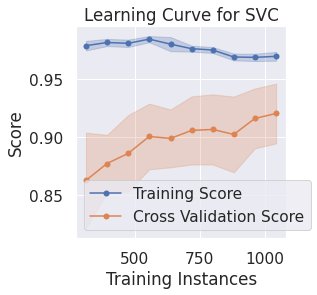

<Figure size 144x144 with 0 Axes>

Number of samples after outlier removal: 1500
Normalization Type: MinMaxScaler
Imputer Type: knn_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.818667  83.216374
1              dtree_classifier    0.752000  80.847953
2           logistic_classifier    0.845333  86.929825
3      random_forest_classifier    0.845333  86.812865
4            xgboost_classifier    0.880000  90.116959
5  gradient_boosting_classifier    0.845333  88.128655
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 90.11695906432749
	 ========CONFUSTION MATRIX=======
[[179  24]
 [ 21 151]]


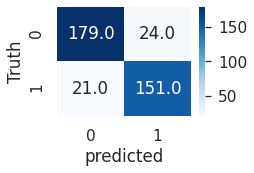

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.90      0.88      0.89       203
        True       0.86      0.88      0.87       172

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



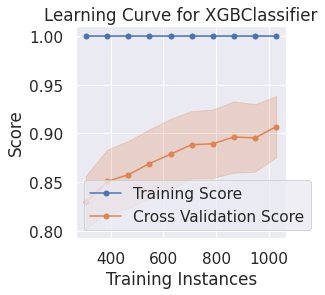

<Figure size 144x144 with 0 Axes>

Normalization Type: StandardScaler
Imputer Type: knn_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.858667  88.203112
1              dtree_classifier    0.754667  80.279552
2           logistic_classifier    0.850667  88.113022
3      random_forest_classifier    0.832000  86.873055
4            xgboost_classifier    0.888000  89.443898
5  gradient_boosting_classifier    0.840000  86.540268
Best MODEL: xgboost_classifier
Best parameters: {'learning_rate': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'binary:logistic'}
Best Average Score: 89.44389844389843
	 ========CONFUSTION MATRIX=======
[[183  20]
 [ 22 150]]


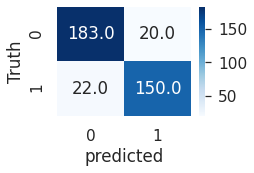

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.89      0.90      0.90       203
        True       0.88      0.87      0.88       172

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



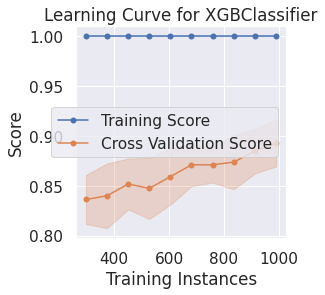

<Figure size 144x144 with 0 Axes>

Normalization Type: QuantileScaler
Imputer Type: knn_imputer
                          Model  Test_Score    CV_MEAN
0                svm_classifier    0.922667  91.143402
1              dtree_classifier    0.762667  80.456649
2           logistic_classifier    0.866667  88.910501
3      random_forest_classifier    0.832000  87.365624
4            xgboost_classifier    0.888000  90.794050
5  gradient_boosting_classifier    0.832000  87.890669
Best MODEL: svm_classifier
Best parameters: {'C': 18.32980711, 'gamma': 0.0379269, 'kernel': 'rbf'}
Best Average Score: 91.14340198321894
	 ========CONFUSTION MATRIX=======
[[188  15]
 [ 14 158]]


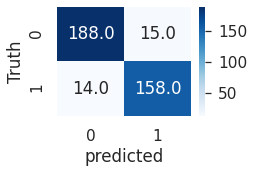

	 ========CLASSIFICATION REPORT=======
	               precision    recall  f1-score   support

       False       0.93      0.93      0.93       203
        True       0.91      0.92      0.92       172

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



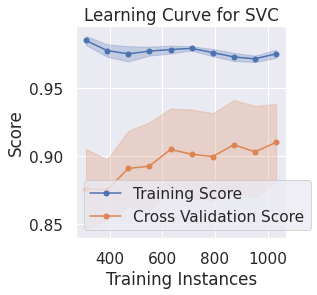

<Figure size 144x144 with 0 Axes>

	 ========Training Done!=======


In [30]:
# Object of OutlierScaler class, used for outlier clipping
outlier_scalar = OutlierScaler()
# list of dictionary of all the model, with values as models best score with
# different Imputation and Scaling Strategy.
score_dict_list = []

"""
 Loop of all the imputing strategies along with dropping of F15 column.
 In each iteration, an imputation strategy is used, then outliers are clipped
 and control moves to initiate training, where all the models are trained against
 the current imputation technique and all the scaling techniques in a loop.
"""
for imputer_type in imputer_list:
  if imputer_type == 'remove_column_F15':
    data = train_data.copy()
    norm_data = impute_data(imputer_type, data)
    X,y = clip_outliers(norm_data)
    init_training(X,y)
  elif imputer_type == 'iterative_imputer':
    data = train_data.copy()
    norm_data = impute_data(imputer_type, data)
    X,y = clip_outliers(norm_data)
    init_training(X,y)
  elif imputer_type == 'simple_imputer':
    for strategy_type in imputer_strategy_list:
      data = train_data.copy()
      print('STRATEGY: ', strategy_type)
      norm_data = impute_data(imputer_type, data, strategy_type)
      X,y = clip_outliers(norm_data)
      init_training(X,y)
  elif imputer_type == 'knn_imputer':
    data = train_data.copy()
    neighbours = 4 #13 Neighbours for KNNImputer
    norm_data = impute_data(imputer_type, data, 'mean', neighbours)
    X,y = clip_outliers(norm_data)
    init_training(X,y)

print('\t \x1b[1;31m'+ '========Training Done!=======' + '\x1b[0m')


#Result

## Best Performing Models

##Wrapper to plot Best performing models

In [31]:
def print_result_plot(plot_score_list, name_list):
  """ 
    Wrapper to boxplot average cross validation of all the models. 

    Parameters:
    plot_score_list (list)  : Consisting of average CV score of all
                              models.
    name_list (DataFrame): name of models

    Returns: 
    None
  """
  from matplotlib import pyplot
  fig = pyplot.figure(figsize=(10,6)) 
  fig.suptitle('Model Comparison') 
  ax = fig.add_subplot(111) 

  sns.boxplot(data=plot_score_list, width=0.5) 
  ax.set_xticklabels(name_list)
  plt.tick_params(labelsize=15)
  plt.xticks(rotation=90)
  pyplot.show()

## Extract Best Performing Model

In [32]:
score_column_name = ['Model','Estimator', 'Scaler', 'Imputer', 'Test_Score', 'CV_MEAN', 'CV_SCORE','Best_Parameters']
# Making DataFrame from dictionary
all_models = pd.DataFrame(score_dict_list, columns=score_column_name )
# Sorting w.r.t max Test score 
all_models = all_models.sort_values(by='Test_Score', ascending=False)

model_list = all_models['Model'].unique()
best_model = []
# Chosing the best performing model of each type based on maximum test score
for model in model_list:
  best_model.append(all_models[ all_models['CV_MEAN'] == (all_models[ all_models['Model'] == model].CV_MEAN.max())])
name = []
cv_scores = []
stack_dict ={}
# Extracting scores for each model
for mod in best_model:
  stack_dict[mod.values[0][0]] = mod.values[0][1]
  normalize_type = mod.values[0][2]
  imputer_type = mod.values[0][3]
  name.append( mod.values[0][0])
  cv_scores.append( mod.values[0][6])
# The best model of them all, with best imputation and scaling strategy, based on maximum test score
final_mod_df = pd.DataFrame(all_models[ all_models['CV_MEAN'] == (all_models['CV_MEAN'].max())], columns=score_column_name)
final_mod_df

,Model,Estimator,Scaler,Imputer,Test_Score,CV_MEAN,CV_SCORE,Best_Parameters
48,svm_classifier,"SVC(C=18.32980711, break_ties=False, cache_siz...",QuantileScaler,simple_imputer,0.901333,91.982759,"[0.9137931034482759, 0.9224137931034483, 0.922...","{'C': 18.32980711, 'gamma': 0.0379269, 'kernel..."


##BOXPLOT all the Models best performace with 

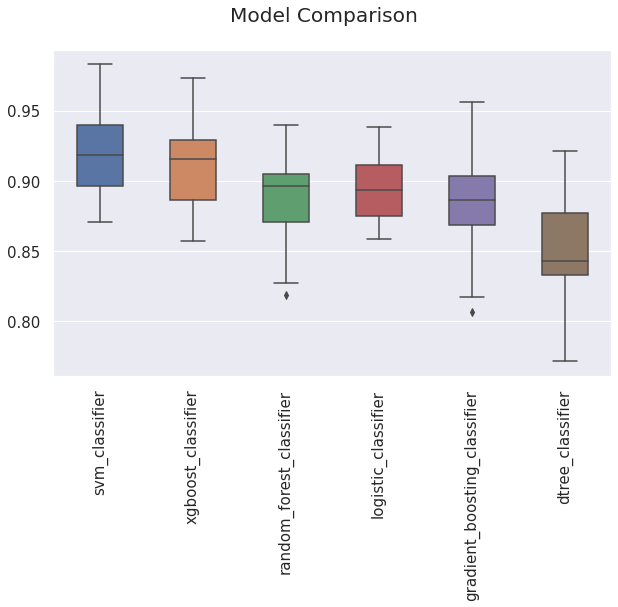

In [33]:
print_result_plot(cv_scores, name)  

##Print Best Estimator for Each Model

In [34]:
from tabulate import tabulate
# printing for a single model, all the performance parameters with different
# imputaion and scaling strategy
def print_best_estimator(model_name):
  """
    This function prints performance of a specific model with different
    imputation and scaling strategy.

    Parameters
    model_name (str): name of the model

    Returns
    None
  """
  score_column_name = ['Model','Estimator', 'Scaler', 'Imputer', 'Test_Score', 'CV_MEAN', 'CV_SCORE','Best_Parameters']
  all_models = pd.DataFrame(score_dict_list, columns=score_column_name )
  best_estimator = all_models[ all_models['Test_Score'] == (all_models[ all_models['Model'] == model_name].Test_Score.max())]
  best_estimator = all_models #To get the list of all the resuls for a single model
  best_estimator.drop(columns=['Estimator', 'CV_SCORE', 'Best_Parameters'], axis=1, inplace=True)
  best_estimator['Model'] = 'Decision Tree'

  print(tabulate(best_estimator,headers=best_estimator.columns))
  # print(best_estimator[['Model','Scaler', 'Imputer', 'CV_MEAN']])

print_best_estimator('dtree_classifier')
print_best_estimator('svm_classifier')
print_best_estimator('xgboost_classifier')

    Model          Scaler          Imputer              Test_Score    CV_MEAN
--  -------------  --------------  -----------------  ------------  ---------
 0  Decision Tree  MinMaxScaler    remove_column_F15      0.730667    74.2723
 1  Decision Tree  MinMaxScaler    remove_column_F15      0.784       76.3759
 2  Decision Tree  MinMaxScaler    remove_column_F15      0.845333    84.9905
 3  Decision Tree  MinMaxScaler    remove_column_F15      0.832       84.1048
 4  Decision Tree  MinMaxScaler    remove_column_F15      0.88        88.3107
 5  Decision Tree  MinMaxScaler    remove_column_F15      0.848       84.5162
 6  Decision Tree  StandardScaler  remove_column_F15      0.850667    86.9226
 7  Decision Tree  StandardScaler  remove_column_F15      0.789333    77.8828
 8  Decision Tree  StandardScaler  remove_column_F15      0.853333    85.1265
 9  Decision Tree  StandardScaler  remove_column_F15      0.821333    84.0664
10  Decision Tree  StandardScaler  remove_column_F15      0.8826

#Stacking

##Applying Stacking with different Scaling Techniques 

Number of samples after outlier removal: 1500
Normalization Type: MinMaxScaler


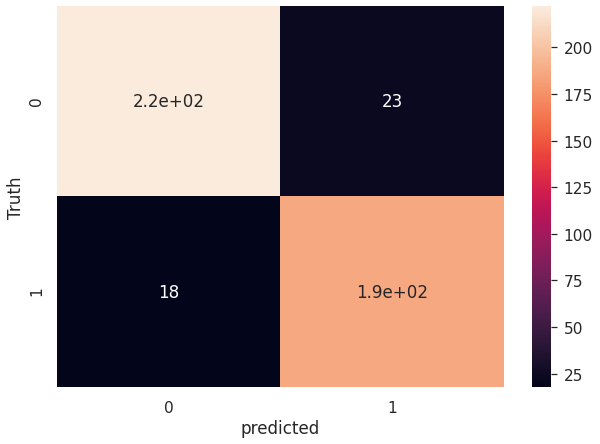

SCORE : 0.9088888888888889
CV_MEAN : 88.00000000000003
Number of samples after outlier removal: 1500
Normalization Type: StandardScaler


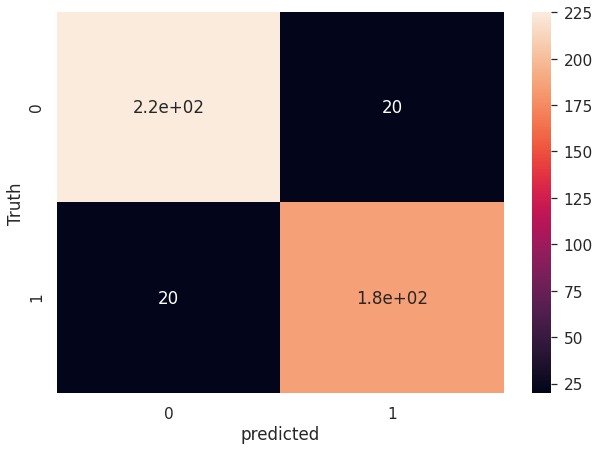

SCORE : 0.9111111111111111
CV_MEAN : 88.4761904761905
Number of samples after outlier removal: 1500
Normalization Type: QuantileScaler


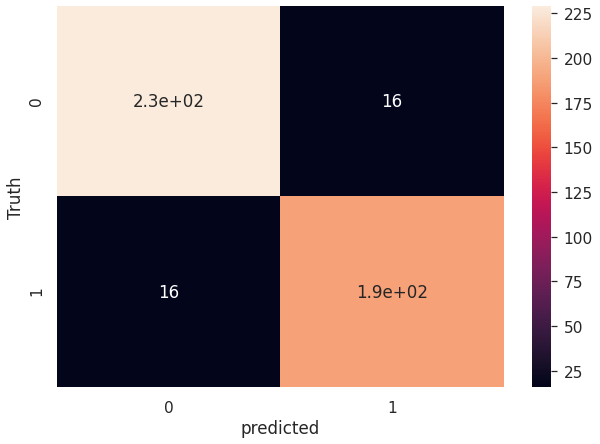

SCORE : 0.9288888888888889
CV_MEAN : 89.4920634920635


In [36]:
data = train_data.copy()
imputed_data = impute_data('knn_imputer', data)
stack_cv_scores = []
stacking_names = []
for normalize_type in scaler_list:
  X,y = clip_outliers(imputed_data)
  X = normalize_data(normalize_type, X)
  data = pd.DataFrame(data, columns=train_data.columns)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state=1 )
  score, cv_mean, stacking_cv_score = stacking_classifier(X_train, y_train, X_test, y_test)
  # print(f'-------{normalize_type}----------------')
  print('SCORE :', score )
  print('CV_MEAN :', cv_mean )
  stack_cv_scores.append(stacking_cv_score)
  stacking_names.append(f'Stacking-{normalize_type}')

##Boxplot Stacking

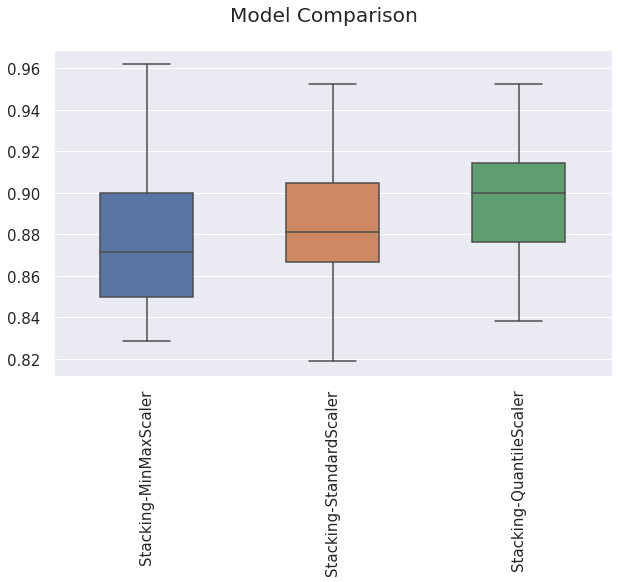

In [38]:
print_result_plot(stack_cv_scores, stacking_names)

#Predictions on Hold-out Test data set

In [57]:
def prediction_test_set(final_mod_df, data):
  """ 
   Prediction on hold out test set. 

    This function does the prediction on hold out test set, it imputes the data
    using the imputer with which best model is obtained and scales the data
    with a scaler using the scaling strategy from the best model.
    It performs prediction using the best model obtained after training.
    After predictions, 'Class' column obtained is attached to the original data 
    frame. The best parameters fro SVC are obtained using validation curver and 
    trying different C and gamma values.

    Parameters:
    
    Returns: 
    test_data_features (DataFrame): Contains test data along with predicted
                                    'Class' column.

  """    
  data = train_data.copy()

  X = data.drop(['Class'],axis=1)
  y = data['Class']
  col_names =(X.columns)

  imputer = KNNImputer(n_neighbors=13)
  X = imputer.fit_transform(X)
  X = pd.DataFrame(X, columns=col_names)
  X['Class'] = y

  x_clipped,y_clipped = clip_outliers(X)

  from sklearn.preprocessing import QuantileTransformer
  scaler = QuantileTransformer(output_distribution='normal')
  x_clipped = scaler.fit_transform(x_clipped)


  X_train, X_test, y_train, y_test = train_test_split(x_clipped,y_clipped,test_size=0.25, random_state=1)

  smt = SMOTETomek(random_state = 2)                  
  X_train, y_train = smt.fit_sample(X_train, y_train)
  
  # The best parameters fro SVC are obtained using validation curve from
  # (yellowbrick library) and trying different C and gamma values.
  svm = SVC(C=9.23670857,gamma=0.02976351)
  svm.fit(X_train,y_train)

  print('Test Score:',svm.score(X_test,y_test))
  print(confusion_matrix(y_test, svm.predict(X_test) ))

  to_predict_set = test_data.copy()

  to_predict_set = to_predict_set.drop(['Class'],axis=1)
  to_predict_set = imputer.transform(to_predict_set)
  to_predict_set = scaler.transform(to_predict_set)
  predictions = svm.predict(to_predict_set)
  data['Class'] = predictions

  return data


Number of samples after outlier removal: 1500
Test Score: 0.9173333333333333
[[184  19]
 [ 12 160]]
False    817
True     683
Name: Class, dtype: int64


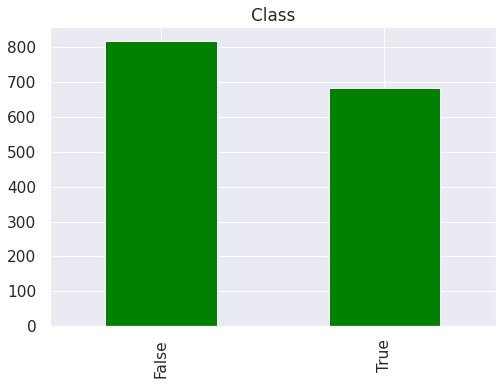

In [58]:
predictions_data_set = prediction_test_set(final_mod_df, test_data)
print(predictions_data_set.Class.value_counts())

predictions_data_set.Class.value_counts().plot(kind = 'bar', title = 'Class', color=["green"])
final_test_data = predictions_data_set


In [60]:
import time
final_test_data.to_csv(f'CE802_P2_Test_{time.strftime("%Y%m%d-%H%M%S")}.csv')